# Introduction


#### Dataset
Berisi mengenai review product pada marketplace Lazada pada tahun 2019

#### Sumber
Data set berasal dari data kaggle dengan link sebagai berikut https://www.kaggle.com/grikomsn/lazada-indonesian-reviews

#### Objective
membuat sentiment analysis terhadapa product review dari Lazada marketplace

# Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install Sastrawi

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for text cleaning
import re
import string
import random

# for visualization
from wordcloud import WordCloud

# for pre-processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from keras.preprocessing.text import Tokenizer
from collections import Counter
from tensorflow.keras import layers
from keras.preprocessing.sequence import pad_sequences

# Model 
import tensorflow as tf

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load Data

In [4]:
df = pd.read_csv("/content/drive/MyDrive/bootcamp_materi/Datascience-cases/Lazada/20191002-reviews.csv")

In [5]:
df.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


In [7]:
df.columns

Index(['itemId', 'category', 'name', 'rating', 'originalRating', 'reviewTitle',
       'reviewContent', 'likeCount', 'upVotes', 'downVotes', 'helpful',
       'relevanceScore', 'boughtDate', 'clientType', 'retrievedDate'],
      dtype='object')

In [8]:
df.describe()

,itemId,rating,originalRating,likeCount,upVotes,downVotes,relevanceScore
count,2.037870e+05,203787.000000,8.0,203787.000000,203787.000000,203787.000000,203787.000000
mean,2.836479e+08,4.603238,1.0,0.668634,0.668634,0.164638,25.097394
std,1.726207e+08,0.991164,0.0,12.192433,12.192433,2.013273,9.602434
min,6.068000e+03,1.000000,1.0,-1.000000,-1.000000,0.000000,0.960000
25%,1.600086e+08,5.000000,1.0,0.000000,0.000000,0.000000,18.010000
50%,3.541160e+08,5.000000,1.0,0.000000,0.000000,0.000000,23.510000
75%,4.147421e+08,5.000000,1.0,0.000000,0.000000,0.000000,29.670000
max,7.242170e+08,5.000000,1.0,1776.000000,1776.000000,111.000000,76.500000


In [9]:
df.shape

(203787, 15)

# Data Cleaning

In [10]:
col_to_use = ["reviewContent", "rating"]

dataset = df.copy()
dataset = dataset[col_to_use]
dataset.head()

,reviewContent,rating
0,bagus mantap dah sesui pesanan,5
1,"Bagus, sesuai foto",4
2,okkkkk mantaaaaaaapppp ... goood,5
3,bagus sesuai,4
4,NaN,5


#### Melihat feature reviewContent dengan rating diatas 4

In [11]:
dataset[dataset['rating'] >= 4]['reviewContent']

0                           bagus  mantap dah sesui pesanan
1                                        Bagus, sesuai foto
2                          okkkkk mantaaaaaaapppp ... goood
3                                              bagus sesuai
4                                                       NaN
                                ...                        
203778                                                  NaN
203780                                               Wkwkwk
203782                 barang bagus dengan harga kompetitif
203784                                                  NaN
203786    semua fitur berfungsi,harganya cukup murah. AK...
Name: reviewContent, Length: 183583, dtype: object

#### Melihat feature reviewContent dengan rating 3

In [12]:
df[df['rating'] <= 2]['reviewContent']

7                                                      bima
8                       baru 10 bulan layarnya dah bergaris
11               Mau tanya ini cicilnya pake apa ya,cc bkn?
13        Pengirim barang tidak sesuai janji. Katanya ex...
15        Bagaimana tv LED saya merek Sharp 24 hitam LC ...
                                ...                        
203742                                                  NaN
203751                               Harga kurang memuaskan
203776    Hrga 2,6jt v giliran di pesan muncul Pembayara...
203779                       Kalo kirim ke kupang bisa gak?
203781    seller incapable to keep his product page clea...
Name: reviewContent, Length: 13131, dtype: object

#### Melihat feature reviewContent dengan rating dibawah 2

In [13]:
df[df['rating'] == 3]['reviewContent']

16            Pengiriman super lama.. tapi datang juga sich
19                                                      NaN
26                                                      NaN
36                                                      NaN
48                               Barang mulusss mantapppppp
                                ...                        
203735                           Stock nya ada lagi gk gan?
203737    Puas sekali.. begitu kita klick untuk paymentn...
203739                                                  NaN
203783                                                  NaN
203785    Ok.thank lazada Pagi order sore barang nyampe ...
Name: reviewContent, Length: 7073, dtype: object

#### Membuat function pemisahan sentimen positive, neutral, dan ngeative

In [14]:

def getScore(score):
  if score <= 2:
    return 'negative'
  elif score == 3:
    return "neutral"
  else:
    return "positive"

#### Membuat features label

In [15]:
dataset['Label'] = dataset['rating'].apply(getScore)

In [16]:
dataset

,reviewContent,rating,Label
0,bagus mantap dah sesui pesanan,5,positive
1,"Bagus, sesuai foto",4,positive
2,okkkkk mantaaaaaaapppp ... goood,5,positive
3,bagus sesuai,4,positive
4,NaN,5,positive
...,...,...,...
203782,barang bagus dengan harga kompetitif,5,positive
203783,NaN,3,neutral
203784,NaN,5,positive
203785,Ok.thank lazada Pagi order sore barang nyampe ...,3,neutral


#### Mengubah feature Label menjadi numerical

In [17]:
label_mapping = { k: i for i, k in enumerate(dataset['Label'].unique(), 0)}
label_mapping

{'negative': 1, 'neutral': 2, 'positive': 0}

In [18]:
dataset['Label'] = dataset['Label'].map(label_mapping)
dataset

,reviewContent,rating,Label
0,bagus mantap dah sesui pesanan,5,0
1,"Bagus, sesuai foto",4,0
2,okkkkk mantaaaaaaapppp ... goood,5,0
3,bagus sesuai,4,0
4,NaN,5,0
...,...,...,...
203782,barang bagus dengan harga kompetitif,5,0
203783,NaN,3,2
203784,NaN,5,0
203785,Ok.thank lazada Pagi order sore barang nyampe ...,3,2


#### Melakukan pengecekan missing values

In [19]:
dataset.isna().sum()

reviewContent    96758
rating               0
Label                0
dtype: int64

#### Mengatasi Missing Values

In [20]:
dataset.dropna(inplace=True)
dataset.isna().sum()

reviewContent    0
rating           0
Label            0
dtype: int64

#### Melakukan pembersihan text

In [21]:
def remove_url(text):
  url = re.compile(r"https?://\S+|www\.\S+")
  return url.sub(r"", text)

def remove_html(text):
  html = re.compile(r"<.*?>")
  return html.sub(r"", text)

def remove_num(text):
  text = re.sub(r"@[A-Za-z0-9]+", '', text)
  return text

def remove_emoji(string):
  emoji_pattern = re.compile(
      "["
      u"\U0001F600-\U0001F64F" #Emoticons
      u"\U0001F300-\U0001F5FF" #symbols & picture
      u"\U0001F680-\U0001F6FF" #transport & map symbols
      u"\U0001F1E0-\U0001F1FF" # flags(iOS)
      u"\U00002702-\U00002780"
      u"\U000024C2-\U0001F251"
      "]+",
      flags=re.UNICODE,
  )
  return emoji_pattern.sub(r"", string)

def remove_punct(text):
  table = str.maketrans("","", string.punctuation)
  return text.translate(table)

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

# Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
def stemmingText(text): 
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

# Convert list of words into sentence
def toSentence(list_words): 
    sentence = ' '.join(word for word in list_words)
    return sentence

In [22]:
dataset['reviewContent'] = dataset['reviewContent'].map(lambda x: remove_url(x))
dataset['reviewContent'] = dataset['reviewContent'].map(lambda x: remove_html(x))
dataset['reviewContent'] = dataset['reviewContent'].map(lambda x: remove_emoji(x))
dataset['reviewContent'] = dataset['reviewContent'].map(lambda x: remove_punct(x))
dataset['reviewContent'] = dataset['reviewContent'].apply(casefoldingText)
dataset['reviewContent'] = dataset['reviewContent'].apply(remove_num)
#dataset['reviewContent'] = dataset['reviewContent'].apply(stemmingText)

#### Menghilangkan stopword

In [23]:
stop = set(stopwords.words('indonesian'))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    
    return " ".join(text)

In [24]:
dataset['reviewContent'] = dataset['reviewContent'].map(remove_stopwords)

# Exploratory Data Analysis

In [76]:
dataset_pos = dataset[dataset['Label'] == 0]
dataset_net = dataset[dataset['Label'] == 2]
dataset_neg = dataset[dataset['Label'] == 1]


#### Visualisasi Workcloud keseluruhan label sentimen

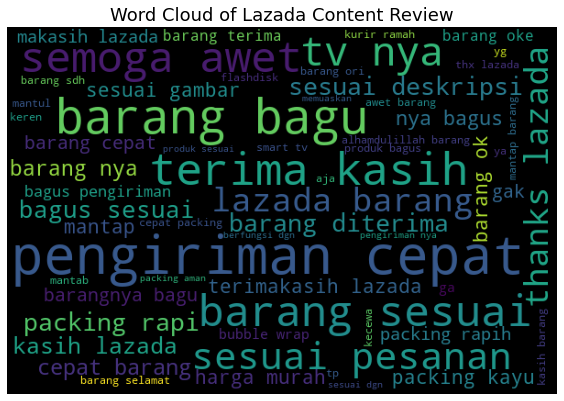

In [25]:
allWords = ' '.join([twts for twts in dataset['reviewContent']])
WordCloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(allWords)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Lazada Content Review', fontsize = 18)
ax.grid(False)
ax.imshow((WordCloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


Dari visualisasi terlihat bahwa kata 'pengiriman cepat' dan 'terima kasih' adalah kata yang sering muncul

#### Visualisasi Wordcloud Label Positive

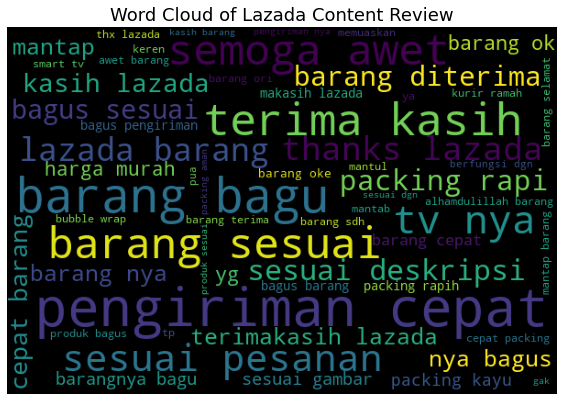

In [79]:
allWords = ' '.join([twts for twts in dataset_pos['reviewContent']])
WordCloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(allWords)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Lazada Positive Review', fontsize = 18)
ax.grid(False)
ax.imshow((WordCloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

#### Visualisasi Wordcloud Label Neutral

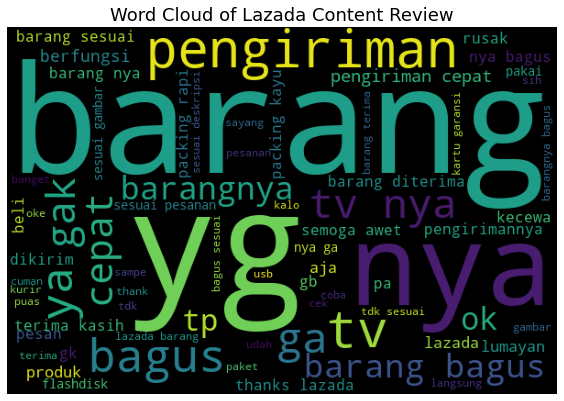

In [81]:
allWords = ' '.join([twts for twts in dataset_net['reviewContent']])
WordCloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(allWords)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Lazada Neutral Review', fontsize = 18)
ax.grid(False)
ax.imshow((WordCloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

#### Visualisasi Wordcloud Label Negative

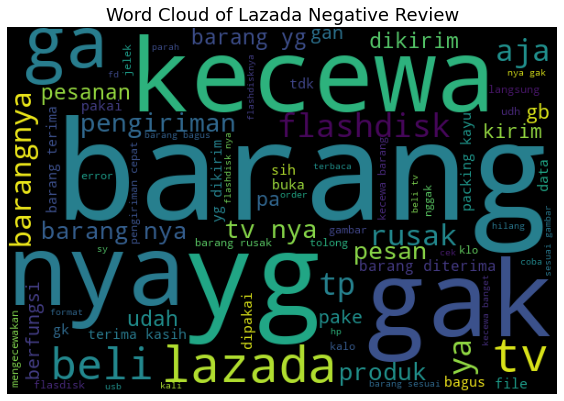

In [83]:
allWords = ' '.join([twts for twts in dataset_neg['reviewContent']])
WordCloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(allWords)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Lazada Negative Review', fontsize = 18)
ax.grid(False)
ax.imshow((WordCloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

#### Persentase Features Label

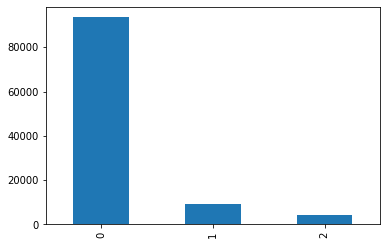

In [26]:
dataset.Label.value_counts().plot(kind='bar');

In [27]:
positive_tweet = dataset[dataset.Label == 0]['reviewContent']
neutral_tweet = dataset[dataset.Label == 2]['reviewContent']
negative_tweet = dataset[dataset.Label == 1]['reviewContent']
print('Persentase Positive tweets = ',round((positive_tweet.shape[0] / dataset.shape[0])*100 ,2))
print('Persentase Neutral tweets = ',round((neutral_tweet.shape[0] / dataset.shape[0])*100 ,2))
print('Persentase Negative tweets = ',round((negative_tweet.shape[0] / dataset.shape[0])*100 ,2))

Persentase Positive tweets =  87.38
Persentase Neutral tweets =  4.08
Persentase Negative tweets =  8.54


#### Melihat contoh kalimat dengan sentimen Positive, Neutral, dan Negative

In [28]:
random_index = random.randint(0, len(dataset)-10)

for row in dataset[['reviewContent', "Label"]][random_index:random_index+5].itertuples():
  _, text, target = row
  if target == 0 :
    print(f"Target: {target} (positive)")
  elif target == 2:
    print(f"Target: {target} (neutral)")
  else:
    print(f"Target: {target} (negative)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (positive)
Text:
alhamdulillah barang diterima dlm mulustq lazada

---

Target: 0 (positive)
Text:
mantaap boss trimks lazada semoga awet

---

Target: 0 (positive)
Text:
mengganggu mendarat tvnya selamat

---

Target: 0 (positive)
Text:
terima kasihbarang

---

Target: 0 (positive)
Text:
kereeennn beloman nyoba mirroring nya

---



# Feature Engineering

#### Splitting data training dan test

In [29]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.10)

untuk menghindari adanya kemungkinan kebocoran data sehingga kita perlu membagi data terlebih dahulu dan kemudian menerapkan fitur engineering

In [30]:
print(f"Total training samples: {len(train_dataset)}")
print(f"Total test samples: {len(test_dataset)}")
print(f"Total samples: {len(train_dataset) + len(test_dataset)}")

Total training samples: 96326
Total test samples: 10703
Total samples: 107029


In [31]:
train_dataset

,reviewContent,rating,Label
200820,packing bagus pakek kayu jd tv baguss,5,0
164761,terima kasih paket cepat nyampai nya senang,5,0
171358,pesan dikirim kecewatolong klw kirim barang di...,1,1
210,mantap,5,0
44594,keren abis pengiriman 1 nyampe dateng langsung...,5,0
...,...,...,...
128100,diinstall siitp barang bagus yg terpenting bar...,5,0
22283,barang ori estimasi pengiriman tgl 11 november...,5,0
148523,dibuka mudahan mengecewakan packing kayu,5,0
185000,memuaskan tanks lazada,5,0


In [32]:
test_dataset

,reviewContent,rating,Label
174325,kecewa banget tdk berfungsi alias tdk konek,1,1
26314,alhamdulillah pakety akhiry smpaikmrn smpat te...,5,0
82443,manteep nih barangnya baguuuuus gaming lanjay ...,5,0
189734,tanggap cepat barang sesuaimantaps,5,0
127043,mantabss gan tv elegan simple mudah operasikan,5,0
...,...,...,...
129880,pengiriman cepat barang mantap,5,0
189103,terima kasih sukses,5,0
114082,mantap kualitas televisinya,5,0
56392,barang bgs murah,5,0


#### Menyiapkan target

In [33]:
X_train, y_train = train_dataset.reviewContent, train_dataset.Label
X_test, y_test = test_dataset.reviewContent, test_dataset.Label

In [34]:
def prepare_targets(y_train, y_test):
    y_train_enc = to_categorical(y_train)
    y_test_enc = to_categorical(y_test)
    return y_train_enc, y_test_enc

y_train, y_test = prepare_targets(y_train, y_test)

#### Melakukan split data train dan validation

In [35]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(X_train.to_numpy(),
                                                                            y_train,
                                                                            test_size=0.2,
                                                                            random_state=42)

In [36]:
train_sentences

array(['good item', 'produk berfungsi ok sesuai harga',
       'tuk atv gk bs diedit lokasiyjd chanel2 yg gk bs dipindahkan dr no urut 1 n dstjd chanel atv berantakan krn gk bs diset berurutan chanel tv yg dilihattlg pencerahany coocaa bgmn cr edit chanel atv',
       ..., 'jossss', 'harga murah murahanokeh pokoknya',
       'flasdisk nya kgk gunain'], dtype=object)

In [37]:
train_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

### Melakukan Tokenization

#### Menghitung Unique kata yang muncul

In [38]:
def counter_word(text):
  count = Counter()
  for i in text.values:
      for word in i.split():
          count[word] += 1
  return count

In [39]:
text = dataset['reviewContent']
counter = counter_word(text)

In [40]:
max_vocab_length = len(counter)
max_vocab_length

30130

#### Menghitung rata-rata token yang dibentuk dalam satu reviewContent

In [41]:
max_length = round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))
max_length

9

#### Setup text vectorization

In [42]:
text_vectorizer = TextVectorization(max_tokens=max_vocab_length, 
                                    split="whitespace", 
                                    output_sequence_length=max_length)

In [43]:
tokenizer = Tokenizer(num_words=max_vocab_length, split=' ')

#### Fit data train ke text_vectorizer

In [44]:
text_vectorizer.adapt(train_sentences)

#### Membuat contoh review untuk membuktikan tokenizer bekerja

In [45]:
sample_sentence = "Barang sudah sampaiii...top banget!!!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 9), dtype=int64, numpy=array([[ 2,  1,  1, 24,  0,  0,  0,  0,  0]])>

In [46]:
random_sentence = random.choice(train_sentences)
print(f"Teks Asli:\n{random_sentence}\
      \n\nVersi Vektorisasi:")
text_vectorizer([random_sentence])

Teks Asli:
mantap makasih kak barang original      

Versi Vektorisasi:


<tf.Tensor: shape=(1, 9), dtype=int64, numpy=array([[ 12,  58, 576,   2,  78,   0,   0,   0,   0]])>

#### Melihat jumlah word in vocab

In [47]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # token terbanyak
bottom_5_words = words_in_vocab[-5:] # token tersedikit
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 28640
Top 5 most common words: ['', '[UNK]', 'barang', 'bagus', 'lazada']
Bottom 5 least common words: ['04082016', '04022017', '0345', '019', '000']


#### Melakukan Word Embedding

In [48]:
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=300,
                             input_length=max_length,
                             trainable=False)

In [49]:
embedding

#### Mengambil random review untuk membuktikan Layers Embedding bekerja 

In [50]:
random_sentence = random.choice(train_sentences)

sample_embed = embedding(text_vectorizer([random_sentence]))
print(f"Teks Asli:\n{random_sentence}\
      \n\nVersi Embedded:", sample_embed)

Teks Asli:
paket sudha diterima sesuia estimasiterimakasih      

Versi Embedded: tf.Tensor(
[[[ 0.0405      0.02064819  0.04150848 ... -0.00620969  0.02127863
    0.04650373]
  [-0.01187543 -0.03043801 -0.02346007 ...  0.00503368 -0.01803552
   -0.00346453]
  [ 0.03891889  0.03739958 -0.01254994 ... -0.00614255 -0.04034443
   -0.04886935]
  ...
  [-0.03479884 -0.03368186 -0.03147586 ...  0.01840493  0.02921497
   -0.00304532]
  [-0.03479884 -0.03368186 -0.03147586 ...  0.01840493  0.02921497
   -0.00304532]
  [-0.03479884 -0.03368186 -0.03147586 ...  0.01840493  0.02921497
   -0.00304532]]], shape=(1, 9, 500), dtype=float32)


# Pendefinisian dan Pelatihan Model

#### Permodelan LSTM

In [51]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(64, dropout=0.5)(x) 
print(x.shape)
outputs = layers.Dense(3, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs, name="model_LSTM")

(None, 9, 500)
(None, 64)


menggunakan activation softmax karena output berupa 3 kategori

In [52]:
model.summary()

Model: "model_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 9)                 0         
_________________________________________________________________
embedding (Embedding)        (None, 9, 500)            15065000  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                144640    
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 15,209,835
Trainable params: 144,835
Non-trainable params: 15,065,000
_________________________________________________________________


### Fit Model

#### Compile model LSTM

In [53]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#### Fit model LSTM

In [54]:
model_history = model.fit(train_sentences,
                          train_labels,
                          batch_size=32, 
                          epochs=100,
                          validation_data=(val_sentences, val_labels))

Epoch 1/100
2409/2409 [==============================] - 49s 20ms/step - loss: 0.3921 - accuracy: 0.8772 - val_loss: 0.3572 - val_accuracy: 0.8789
Epoch 2/100
2409/2409 [==============================] - 45s 19ms/step - loss: 0.3636 - accuracy: 0.8824 - val_loss: 0.3409 - val_accuracy: 0.8852
Epoch 3/100
2409/2409 [==============================] - 42s 18ms/step - loss: 0.3500 - accuracy: 0.8856 - val_loss: 0.3331 - val_accuracy: 0.8904
Epoch 4/100
2409/2409 [==============================] - 43s 18ms/step - loss: 0.3403 - accuracy: 0.8882 - val_loss: 0.3307 - val_accuracy: 0.8883
Epoch 5/100
2409/2409 [==============================] - 41s 17ms/step - loss: 0.3280 - accuracy: 0.8908 - val_loss: 0.3157 - val_accuracy: 0.8946
Epoch 6/100
2409/2409 [==============================] - 41s 17ms/step - loss: 0.3179 - accuracy: 0.8931 - val_loss: 0.3053 - val_accuracy: 0.8969
Epoch 7/100
2409/2409 [==============================] - 41s 17ms/step - loss: 0.3056 - accuracy: 0.8969 - val_loss: 0

### Model LSTM Evaluation

In [55]:
y_pred = model.predict(val_sentences)

In [56]:
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

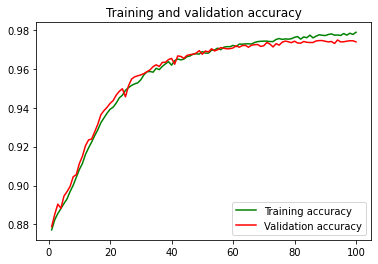

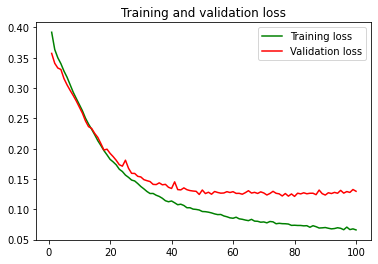

In [57]:
# Plot results
acc = model_history.history["accuracy"]
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [58]:
model_results = calculate_results(y_true= val_labels.argmax(axis=1), 
                                    y_pred= y_pred.argmax(axis=1))
model_results

{'accuracy': 97.38399252569293,
 'f1': 0.973047831807429,
 'precision': 0.9732677858471102,
 'recall': 0.9738399252569293}

# Data Inference

#### Membuat data baru

In [59]:
otherData = pd.DataFrame()
otherData['text'] = ["Kereeeeen...barang sesuai gambar, pengiriman cepat...puas banget belanja",
                     "Udah lama...pas dateng barang ga sesuai lagi...kapok beli disini lagi deh!!" 
                    ]

#### Preprocessing data baru

In [60]:
otherData['text_clean'] = otherData['text'].map(lambda x: remove_url(x))
otherData['text_clean'] = otherData['text'].map(lambda x: remove_html(x))
otherData['text_clean'] = otherData['text'].map(lambda x: remove_emoji(x))
otherData['text_clean'] = otherData['text'].map(lambda x: remove_punct(x))
otherData['text_clean'] = otherData['text'].map(remove_stopwords)
otherData['text_clean'] = otherData['text'].apply(casefoldingText)
otherData['text_clean'] = otherData['text'].apply(remove_num)

otherData.drop(['text'], axis = 1, inplace = True)

otherData

,text_clean
0,"Kereeeeen...barang sesuai gambar, pengiriman c..."
1,Udah lama...pas dateng barang ga sesuai lagi.....


#### Prediksi dengan data baru

In [61]:
predict = model.predict(otherData['text_clean'])

if predict.argmax(axis=1)[0] == 0:
  print("Review Positif")
elif predict.argmax(axis=1)[0] == 1:
  print("Review Neutral")
else:
  print("Review Negative")

if predict.argmax(axis=1)[1] == 0:
  print("Review Positif")
elif predict.argmax(axis=1)[1] == 1:
  print("Review Neutral")
else:
  print("Review Negative")

Review Positif
Review Neutral
